This guy doesn't seem to respond to the LED.

In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator import plot_resonator, lmfit_models, lmfit_resonator

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2017-03-01_140729_led.npd/')

In [4]:
swp = npd.SingleSweep0
sss = npd.SingleSweepStream1
snap = npd.ADCSnap2

In [5]:
sss.stream.tone_offset_frequency()

array([ 0.])

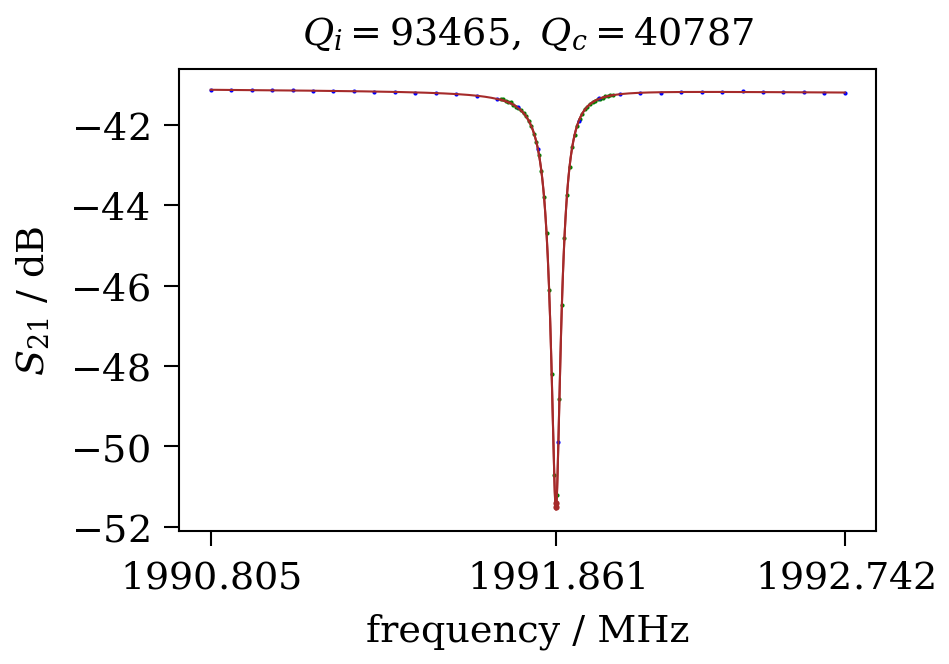

In [9]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz')
ax.set_ylabel('$S_{21}$ / dB')
plot_resonator.amplitude(ax, sss.resonator, data_color='green')
plot_resonator.amplitude(ax, swp.resonator)
ax.set_title(r'$Q_i = {:.0f}, \; Q_c = {:.0f}$'.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

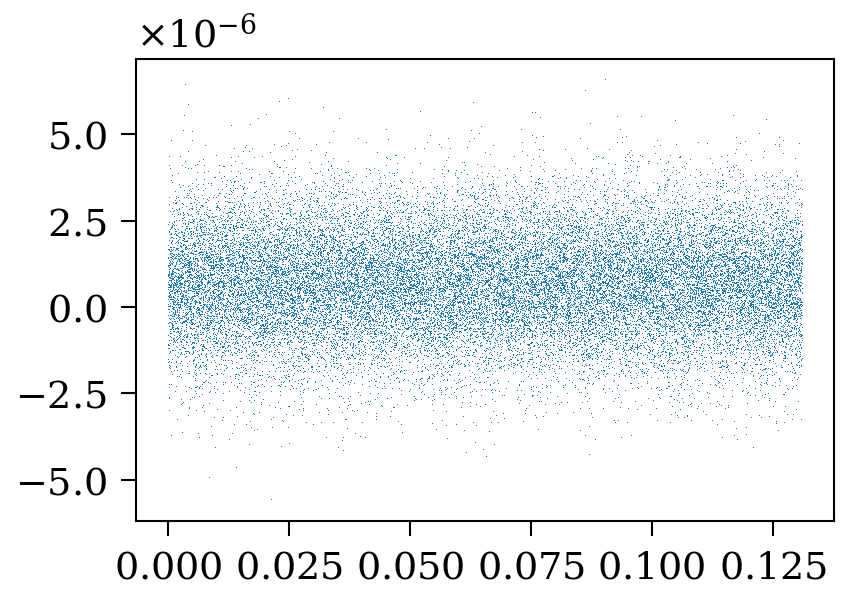

In [7]:
start_index = 0
end_index = 2**15
fig, ax = plt.subplots()
ax.plot(sss.stream.sample_time[start_index:end_index],
        sss.x[start_index:end_index], ',')

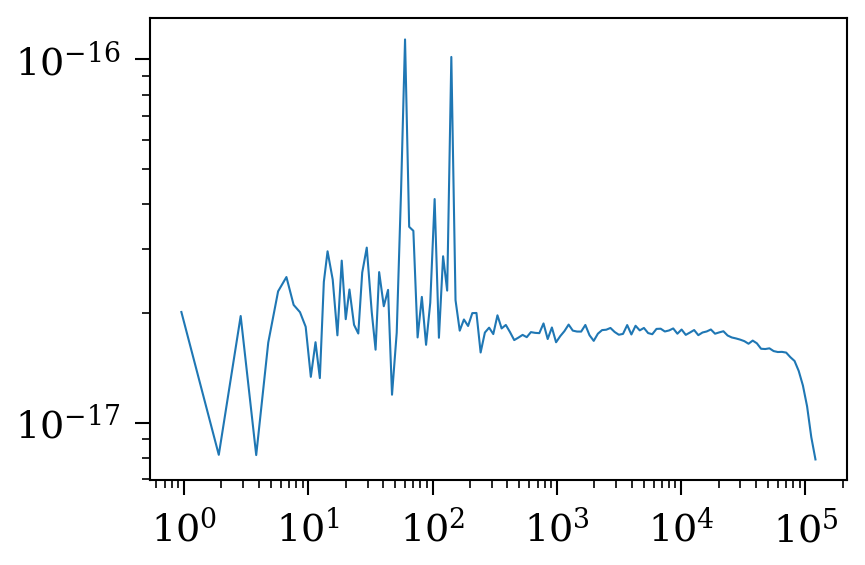

In [8]:
fig, ax = plt.subplots()
ax.loglog(sss.S_frequency, sss.S_xx)